<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B6%5D_ER_cHB_SVM_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Feed Effect on Biocrude ER Data ML 111020.csv')
Oil_ER = data['Bio-crude Oil ER']
Features = data.drop('Bio-crude Oil ER', axis = 1)

# Success
print ("Bio-crude ER dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude ER dataset has 130 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,52.4
30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,82.7
60,10.0,34.0,0.0,0.0,29.3,0.0,6.8,65.5
90,3.5,16.9,17.4,8.9,0.0,35.4,4.5,60.5
120,13.9,46.9,0.0,0.0,28.0,0.0,3.5,60.2


In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use now.
# Define predict score
import numpy as np
def performance_metric2(y_true, y_predict):
  """Calculate and reture the ratio of predict value to predict score"""
  y_true_arr = np.arr(y_true)
  y_predict_arr = np.arr(y_predict)

  # Mean value of dataset
  y_true_mean = np.mean(y_true_arr)

  ss_tot = 0
  ss_reg = 0
  ss_res = 0

  for index in range (y_true_arr):
    ss_tot += (y_true_arr[index] - y_true_mean)**2
  
  for index in range (y_true_arr):
    ss_reg += (y_predict_arr[index] - y_true_mean)**2
  
  for index in range (y_true_arr):
    ss_res += (y_predict_arr[index] - y_true_arr[index])**2
  
  score = 1 - (ss_res/ss_tot)

  return score

In [3]:
# TODO: Import 'SVM'
from sklearn.svm import SVR

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    svr = SVR(kernel='linear', C=100, gamma='auto')
    svr.fit(X_train, y_train)
    
    y_train_predict = svr.predict(X_train)
    y_test_predict = svr.predict(X_test)
    
    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1

    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 12.987046804479974
Standard deviation of MAE of training set 0.7689632132077695
Mean value of MAE of test set 13.853588352057661
Standard deviation of MAE of test set 2.1271166571318956

Mean value of RMSE of training set 17.752296555825037
Standard deviation of RMSE of training set 1.5482613491375181
Mean value of RMSE of test set 18.164002474941647
Standard deviation of RMSE of test set 3.124247765744789

Mean value of R2 of training set 0.2016907442882461
Standard deviation of R2 of training set 0.10434019704093954
Mean value of R2 of test set 0.1373909054079751
Standard deviation of R2 of test set 0.21351734119806345

Mean value of MRE of training set 0.2952608338742348
Standard deviation of MRE of training set 0.014874142733664417
Mean value of MRE of test set 0.3146571321038388
Standard deviation of MRE of test set 0.04107117001850108


Text(0.5, 1.0, 'y_pred vs. y_true')

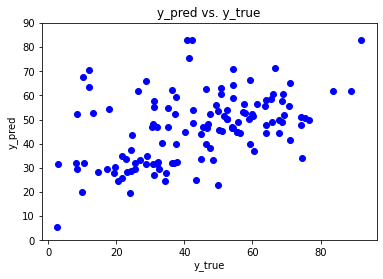

In [4]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [5]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_SVM.csv', index = False, header=True)

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria
# Show predictions
for i, Oil_Yield in enumerate(svr.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 32.25 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 34.50 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 27.57 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, svr.fit, feedstock_composition_data[i:i+1])

Trial 1: $32.23
Trial 2: $33.22
Trial 3: $32.68
Trial 4: $35.14
Trial 5: $32.97
Trial 6: $33.46
Trial 7: $32.92
Trial 8: $34.91
Trial 9: $32.71
Trial 10: $32.59

Range in prices: $2.91
Trial 1: $35.10
Trial 2: $35.25
Trial 3: $36.33
Trial 4: $34.24
Trial 5: $35.55
Trial 6: $35.83
Trial 7: $35.01
Trial 8: $37.20
Trial 9: $35.99
Trial 10: $34.90

Range in prices: $2.96
Trial 1: $27.63
Trial 2: $28.00
Trial 3: $27.79
Trial 4: $27.49
Trial 5: $27.76
Trial 6: $27.62
Trial 7: $27.16
Trial 8: $28.11
Trial 9: $27.62
Trial 10: $27.17

Range in prices: $0.95
